In [1]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

In [2]:
from utils.tracking import extract, find_params
from utils.tracking import pseudo_voigt_fit1,gaus_fit1, voigt_fit1


In [3]:
# ## handling the 3D humidity only files. Only took the intergration of 
# path  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/circular_average'

# infiles = glob.glob(os.path.join(path, '*'+'*.dat'))

# data = extract(infiles[0])

# # find parameter index function



In [4]:
# # finding the start and end of an array for the 001 plane
# x1_3D = np.where(abs(data[:,0]-.95)<= .01)
# ind1 = x1_3D[0][0]
# x2_3D = np.where(abs(data[:,0]-1.1)<= .01)
# ind2 =x2_3D[0][0]


# # finding the start and end of an array for the lead iodide peak
# x1_pb = np.where(abs(data[:,0]-.85)<= .01)
# ind1_pb = x1_pb[0][0]
# x2_pb = np.where(abs(data[:,0]-.97)<= .01)
# ind2_pb =x2_pb[0][0]

# # plt.figure(figsize = (7,8))
# # plt.plot(data[ind1:ind2,0],data[ind1:ind2,1])

# # # assuming the 
# # time_val = [x for x in parameters if 's' in x][0][:-1]
# # print(time_val)

# val_pb= []
# val_3D = []
# time = []
# for i in range(len(infiles)):
#     data = extract(infiles[i])
#     # print(infiles[i])
#     parameters = find_params(infiles[i])

#     # dont look at the other x position values here
#     position = [x for x in parameters if 'x' in x][0]

#     if 'x-0.0' not in position:
#         # print([x for x in parameters if 'x' in x][0])
#         continue
    
#     time_val = [x for x in parameters if 's' in x][0][:-1]
#     time.append(float(time_val))
#     val_3D.append(sp.integrate.trapz(data[ind1:ind2,1]))
#     val_pb.append(sp.integrate.trapz(data[ind1_pb:ind2_pb,1]))



# val_pb_pos2 = []
# val_3D_pos2 = []
# time_pos2 = []
# for i in range(len(infiles)):
#     data = extract(infiles[i])
#     # print(infiles[i])
#     parameters = find_params(infiles[i])

#     # dont look at the other x position values here
#     position = [x for x in parameters if 'x' in x][0]

#     if 'x-0.0' in position:
#         # print([x for x in parameters if 'x' in x][0])
#         continue
    
#     time_val = [x for x in parameters if 's' in x][0][:-1]
#     time_pos2.append(float(time_val))
#     val_3D_pos2.append(sp.integrate.trapz(data[ind1:ind2,1]))
#     val_pb_pos2.append(sp.integrate.trapz(data[ind1_pb:ind2_pb,1]))





In [5]:
# # plt.plot(time, val_3D, '*')

# time = np.array(time)
# time_pos2 = np.array(time_pos2)
# val_3D = np.array(val_3D)
# val_pb = np.array(val_pb)
# val_3D_pos2 = np.array(val_3D_pos2)
# val_pb_pos2 = np.array(val_pb_pos2)


# indt = np.argsort(time)
# indt2 = np.argsort(time_pos2)

# plt.figure()
# plt.plot(time[indt], val_3D[indt], label = 'x = 0.0')
# plt.plot(time_pos2[indt2],val_3D_pos2[indt2], label= 'x = 0.5')
# plt.title('001 diffraction area')
# plt.legend()



# plt.figure()
# plt.plot(time[indt], val_pb[indt], label = 'x = 0.0')
# plt.plot(time_pos2[indt2],val_pb_pos2[indt2], label = 'x = 0.5')
# plt.title('PbI2 diffraction area')
# plt.legend()


In [6]:
# timestamp = np.arange(0,8000, 1000)

# plt.figure(figsize = (9,9))
# for i in range(len(infiles)):
#     data = extract(infiles[i])
#     # print(infiles[i])
#     parameters = find_params(infiles[i])

#     # dont look at the other x position values here
#     position = [x for x in parameters if 'x' in x][0]

#     if 'x-0.0' not in position:
#         # print([x for x in parameters if 'x' in x][0])
#         continue
    
#     time_val = [x for x in parameters if 's' in x][0][:-1]

#     # print(int(float(time_val)))
#     if int(float(time_val)) %1000 <= 60:
#         print(time_val)
#         plt.plot(data[:,0], data[:,1], label = time_val)
    
# plt.legend()
# plt.show()




This section is the analysis of the 2D BA n=3 perovskite under RT and in 100% 

In [48]:
path  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite/maxs/analysis/BA_n3_hum_only_test4/qr_axis'

infiles = glob.glob(os.path.join(path, '*'+'*.dat'))

data = extract(infiles[0])

# finding the start and end of an array for the 001 plane
x1_111 = np.where(abs(data[:,0]-.9)<= .01)
ind1 = x1_111[0][0]
x2_111 = np.where(abs(data[:,0]-1.15)<= .01)
ind2 =x2_111[0][0]

data_file = []
time = []
for i in range(len(infiles)):
    data = extract(infiles[i])
    # print(infiles[i])
    parameters = find_params(infiles[i])

    # dont look at the other x position values here
    position = [x for x in parameters if 'x' in x][0]

    if 'x-0.0' not in position:
        # print([x for x in parameters if 'x' in x][0])
        continue
    
    time_val = [x for x in parameters if 's' in x][0][:-1]
    time.append(float(time_val))

    data_file.append(data)

time = np.array(time)


In [49]:
from utils.tracking import voigt_fit2, plotting_model
indx = np.argsort(time)
time = time[indx]

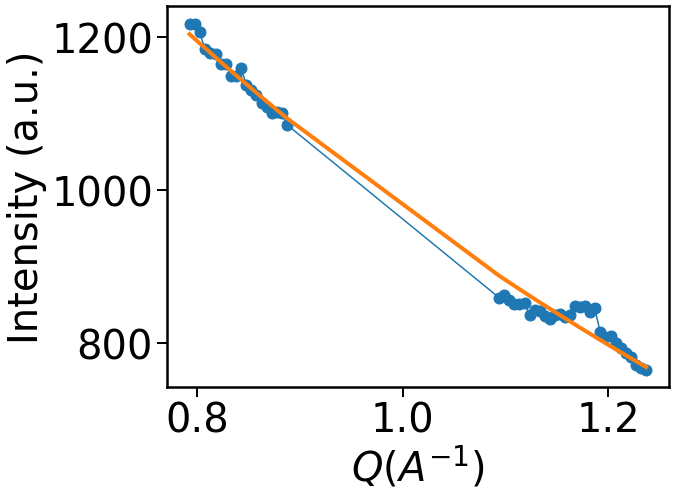

In [50]:
# subtrack out the background from the data

from utils.tracking import background_model

# finding the start and end of an array for the 001 plane
x1_bg = np.where(abs(data[:,0]-.8)<= .01)
ind1_bg = x1_bg[0][0]
x2_bg = np.where(abs(data[:,0]-1.25)<= .01)
ind2_bg =x2_bg[0][0]

bg_data = data_file[indx[0]]

# finding the start and end of an array for the 001 plane
x1_111 = np.where(abs(data[:,0]-.9)<= .01)
ind1 = x1_111[0][0]
x2_111 = np.where(abs(data[:,0]-1.1)<= .01)
ind2 =x2_111[0][0]

indices = np.concatenate((np.arange(ind1_bg, ind1),np.arange(ind2, ind2_bg)),axis = 0 )

bg_data = bg_data[indices,:]

bg_model = background_model(bg_data, int_guess= [1000, 10], linear = False)

plotting_model(bg_data, bg_model)



In [51]:

# data_file = data_file[indx]

plt.figure(figsize= (9,9))
# for i in indx:
#     plt.plot(data_file[i][ind1:ind2,0],data_file[i][ind1:ind2,1])

# plt.plot(data_file[indx[0]][ind1:ind2,0],data_file[indx[0]][ind1:ind2,1])


data = data_file[indx[0]][ind1:ind2,:]

bg_model = sp.interpolate.interp1d(bg_data[:,0], bg_data[:,1])

data[:,1] = data[:,1] - bg_model(data[:,0])



<Figure size 648x648 with 0 Axes>

Parameters([('PV_amplitude', <Parameter 'PV_amplitude', value=1.0, bounds=[-inf:inf]>), ('PV_center', <Parameter 'PV_center', value=0.0, bounds=[-inf:inf]>), ('PV_sigma', <Parameter 'PV_sigma', value=1.0, bounds=[0:inf]>), ('PV_gamma', <Parameter 'PV_gamma', value=1.0, bounds=[-inf:inf], expr='PV_sigma'>), ('PV_fwhm', <Parameter 'PV_fwhm', value=3.6012906381881353, bounds=[-inf:inf], expr='1.0692*PV_gamma+sqrt(0.8664*PV_gamma**2+5.545083*PV_sigma**2)'>), ('PV_height', <Parameter 'PV_height', value=0.20870928052036772, bounds=[-inf:inf], expr='(PV_amplitude/(max(1e-15, PV_sigma*sqrt(2*pi))))*wofz((1j*PV_gamma)/(max(1e-15, PV_sigma*sqrt(2)))).real'>)])
Residual is:  707.4491901341238


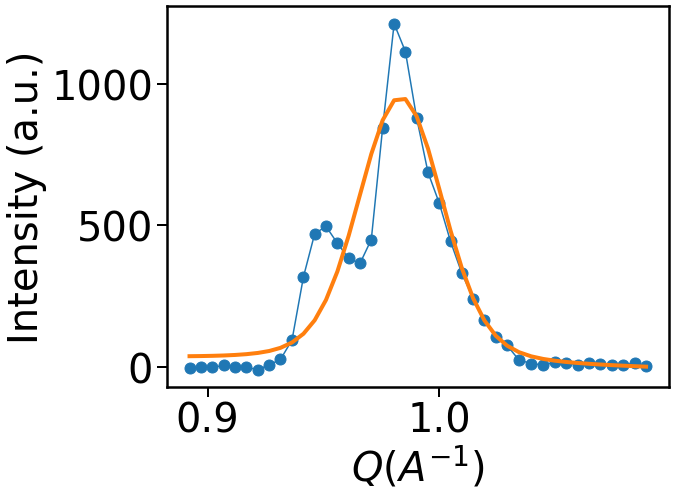

In [56]:
out = voigt_fit2(data, int_guess= [.96, 500, .005, .005, 1, 100, .01, .01, 0, 0], background = 'linear')

plotting_model(data, out)

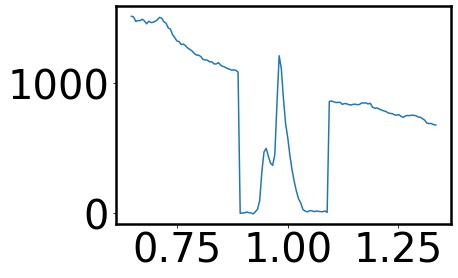

In [57]:
plt.plot(data_file[indx[0]][ind1-50:ind2+50,0],data_file[indx[0]][ind1-50:ind2+50,1])

In [ ]:
from utils.function import pseudovoigt

pseudovoigt([100, 1.1, 0.1, 0.1], data[:,0])

In [12]:
# This is to double check the beam0 position in calibration

# path45  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/plus_45'
# path_45 = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/minus_45'
# path_zero = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/zero'



# infiles1 = glob.glob(os.path.join(path45, '*_0.0*'+'*.dat'))
# infiles2 = glob.glob(os.path.join(path_45, '*_0.0*'+'*.dat'))
# infiles3 = glob.glob(os.path.join(path_zero, '*_0.0*'+'*.dat'))

# print(infiles1)
# print(infiles2)
# print(infiles3)

# data_plus = extract(infiles1[0])
# data_minus = extract(infiles2[0])
# data_zero = extract(infiles3[0])

# # finding the start and end of an array
# x1 = np.where(abs(data_plus[:,0]-.95)<= .01)
# ind1 = x1[0][0]
# x2 = np.where(abs(data_plus[:,0]-1.08)<= .01)
# ind2 =x2[0][0]


# # # finding the start and end of an array
# # x1 = np.where(abs(data_minus[:,0]-.2)<= .01)
# # ind1 = x1[0][0]
# # x2 = np.where(abs(data_minus[:,0]-3)<= .01)
# # ind2 =x2[0][0]

# plt.figure(figsize = (8,10))
# plt.plot(data_plus[ind1:ind2,0], data_plus[ind1:ind2,1], 'r')
# plt.plot(data_minus[ind1:ind2,0], data_minus[ind1:ind2,1], 'b')
# plt.plot(data_zero[ind1:ind2,0], data_zero[ind1:ind2,1], 'g')
